In [40]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

## Load images

In [41]:
img = Image.open('../images/hibiscus.bmp')
img.load()
data = np.asarray(img)

In [42]:
data_grey = np.mean(data, axis=2)

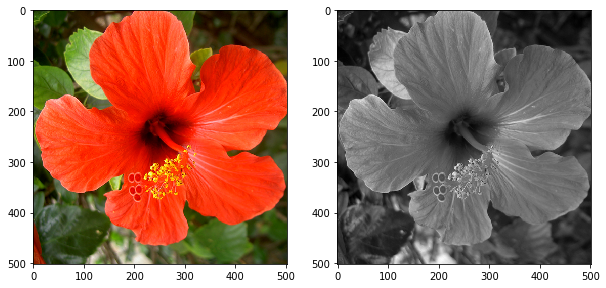

In [43]:
fig=plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(data)

fig.add_subplot(1, 2, 2)
plt.imshow(data_grey, cmap='gray')

## FFT

In [59]:
fft = np.fft.fft2(data_grey)
fft = np.fft.fftshift(fft)

## Translate

In [60]:
Tx = 20.9898
Ty = 40.981234342

In [63]:
fft_translated = np.array(fft)
for i in range(502):
    for j in range(502):
        fft_translated[i, j] *= np.exp(-2*np.pi*1j * ((Tx*i/502 + Ty*j/502)))

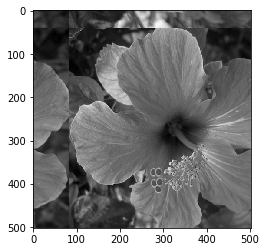

In [64]:
ifft_translated = np.fft.ifftn(fft_translated)
plt.imshow(abs(ifft_translated), cmap='gray')

## In colors

In [82]:
fft_r = np.fft.fftshift(np.fft.fft2(np.transpose(data, (2, 0, 1))[0]))
fft_g = np.fft.fftshift(np.fft.fft2(np.transpose(data, (2, 0, 1))[1]))
fft_b = np.fft.fftshift(np.fft.fft2(np.transpose(data, (2, 0, 1))[2]))

In [83]:
fft_translated_r = np.array(fft_r)
for i in range(502):
    for j in range(502):
        fft_translated_r[i, j] *= np.exp(-2*np.pi*1j * ((Tx*i/502 + Ty*j/502)))
        
fft_translated_g = np.array(fft_g)
for i in range(502):
    for j in range(502):
        fft_translated_g[i, j] *= np.exp(-2*np.pi*1j * ((Tx*i/502 + Ty*j/502)))

fft_translated_b = np.array(fft_b)
for i in range(502):
    for j in range(502):
        fft_translated_b[i, j] *= np.exp(-2*np.pi*1j * ((Tx*i/502 + Ty*j/502)))

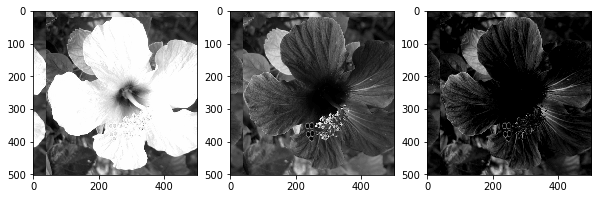

In [84]:
fig=plt.figure(figsize=(10, 10))

fig.add_subplot(1, 3, 1)
ifft_translated_r = np.fft.ifftn(fft_translated_r)
plt.imshow(abs(ifft_translated_r), cmap='gray')

fig.add_subplot(1, 3, 2)
ifft_translated_g = np.fft.ifftn(fft_translated_g)
plt.imshow(abs(ifft_translated_g), cmap='gray')

fig.add_subplot(1, 3, 3)
ifft_translated_b = np.fft.ifftn(fft_translated_b)
plt.imshow(abs(ifft_translated_b), cmap='gray')

In [112]:
ifft_translated_rgb = np.dstack((np.fft.ifftn(fft_translated_r), np.fft.ifftn(fft_translated_g), np.fft.ifftn(fft_translated_b)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


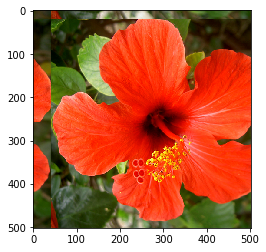

In [113]:
plt.imshow(np.abs(ifft_translated_rgb)/255)